# Stroop Effect
## Testing a Perceptual Phenomenon
##### Tania Lincoln January 1, 2017

### Summary
In this project, we use descriptive statistics and a statistical test to investigate a classic phenonmenon from experimental psychology called Stroop Effect.  In the Stroop experiment, participants were presented with a list of words displayed in an ink color which sometimes matched the word and sometimes did not.  In each case, the time it take to name the color of the ink were recorded.

### Import Libraries

In [27]:
#import basic libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import statsmodels
import seaborn as sns
from math import *
from scipy import stats
%matplotlib inline

### Display Current Environment Info

In [2]:
# Always good practice to note the version info
print("python " + sys.version)
print("")
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)
print("seaborn " + sns.__version__)
print("stats " + statsmodels.__version__)

python 2.7.13 |Anaconda 4.3.1 (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]

pandas 0.19.2
numpy 1.13.1
seaborn 0.7.1
stats 0.6.1


### Load Data

In [3]:
stroop_df = pd.read_csv('stroopdata.csv')

### View Data

In [4]:
# View some basic stats about the data
stroop_df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [5]:
# since there are a small number of rows, 24 observations
# print out the data
stroop_df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


Congruent - The ink color and the word refer to the same color or colors that match.

Incongruent - The ink color and the word refer to different colors or colors that do not match.

### Questions

##### 1.  What is our independent and dependent variables

Independent - Color/Word (Incongruent and Congruent)

Dependent - Response time to name the ink color

##### 2.  What is an appropriate set of hypotheses for this task?  What kind of statistical test can we expect to perform?

Null Hypothesis

There is no difference in the population average response time in viewing the incongruent words (identified with subscript i) versus viewing the congruent (identified with subscript c) words.

\begin{equation*}
\mathbf{H}_0 \space \colon \space \space \mu_i - \mu_c = 0
\end{equation*}

Alternative Hypothesis

These is a difference in the population average response time in viewing the incongruent words versus viewing the congruent words.

\begin{equation*}
\mathbf{H}_a \space \colon \space \space \mu_i - \mu_c \ne 0
\end{equation*}

The paired t-test is the right statistical test since the popultion time to complete the two tasks is unknown, the sample size is below 25, and we are assuming the distributions are normal.  Because the same subjets completed the same tasks under different conditions the two samples are dependant.  

Additionally, in our alternative hypothesis, we stating that the difference can be be greater or lesser than each other, and thus means we need to use the two-tailed t-test.

##### 3.  Report some descriptive statistics

In [6]:
#finding the mean
congruent_mean = stroop_df['Congruent'].mean()
incongruent_mean =stroop_df['Incongruent'].mean()
mean_diff = incongruent_mean - congruent_mean

#finding the standard deviation
congruent_std = stroop_df['Congruent'].std()
incongruent_std =stroop_df['Incongruent'].std()
std_diff = incongruent_std - congruent_std

#finding the standard error of the mean difference
congruent_sem = stroop_df['Congruent'].sem()
incongruent_sem =stroop_df['Incongruent'].sem()

print "The mean of the congruent data is", \
    round(congruent_mean, 2)

print "The mean of the incongruent data is", \
    round(incongruent_mean, 2)
    
print "The mean difference is", \
    round(mean_diff, 2), "\n"

print "The standard deviation of the congruent data is", \
    round(congruent_std, 2)
    
print "The standard deviation of the incongruent data is", \
    round(incongruent_std, 2), "\n"
    
print "The standard error of the mean difference of the congruent data is", \
    round(congruent_sem, 2)
    
print "The standard error of the mean difference of the incongruent data is", \
    round(incongruent_sem, 2)

The mean of the congruent data is 14.05
The mean of the incongruent data is 22.02
The mean difference is 7.96 

The standard deviation of the congruent data is 3.56
The standard deviation of the incongruent data is 4.8 

The standard error of the mean difference of the congruent data is 0.73
The standard error of the mean difference of the incongruent data is 0.98


##### 4.  Provide 1-2 visualizations that show the distribution of the sample data.  Write a couple of sentences noting what was observed about the plots.

#### Boxplot

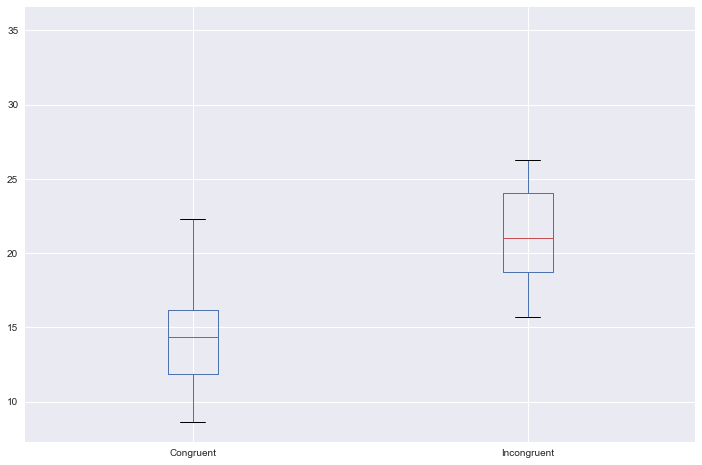

In [7]:
# Show a boxplot of the data
stroop_df.plot(kind='box', figsize=(12,8))

This boxplot shows that incongruent times were higher than congruent times.

#### Histograms

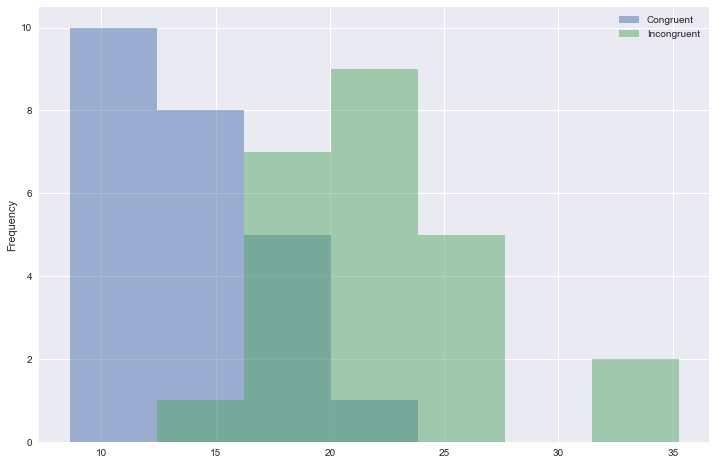

In [8]:
#show an overlay of incongruent and congruent data
stroop_df.plot(kind='hist', figsize=(12,8), alpha=.5, bins = 7)

It's difficult to see the layout of the data.  Will split these into two.

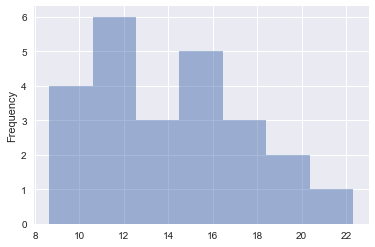

In [9]:
stroop_df['Congruent'].plot(kind='hist', alpha=.5, bins = 7)

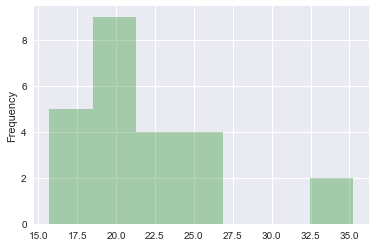

In [10]:
stroop_df['Incongruent'].plot(kind='hist', color='green', alpha=.3, bins = 7)

They both are right long tailed.

##### 5.  Perform the statistical test and report the results.  What is the confidence level and the critical statistical value?  Do you reject the null hypothesis or fail to reject it?  Come to a conclusion in terms of the experiment task.  Did the results match the expectations?

##### To find the t-critical score, we use the following method.

We use a confidence level of $\alpha$ = .05, which is a standard value. 

We use 23 degrees of freedom since each test had 24 participants.  See below forumula:


\begin{equation*}
\mathbf{df} \space = \space n - 1
\end{equation*}

Taken from the following [link](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf), the t-critical value for a two-tail test = 2.069, 

Recall the mean difference of 7.96 from above.

##### To find the t-score, we use the following formula.
$\bar x$ = sample mean

$\mu_0$ = population mean

$s$ = sample standard deviation

$n$ = sample size

\begin{equation*}
\mathbf t = \frac{\bar x - \mu_0}{s \space / \space \sqrt n}
\end{equation*}

To find the sample standard deviation...

In [33]:
# Take the sample difference
stroop_df['Incongruent - Congruent'] = \
    stroop_df['Incongruent'] - stroop_df['Congruent']
    
stroop_df['Diff_From_Mean'] = \
    stroop_df['Incongruent - Congruent'] - \
    stroop_df['Incongruent - Congruent'].mean()
    
stroop_df['Squared_Diff_Mean'] = \
    stroop_df['Diff_From_Mean'] * stroop_df['Diff_From_Mean']
    
sum_of_squared_diff = stroop_df['Squared_Diff_Mean'].sum()
sample_std_dev = sqrt(sum_of_squared_diff/23)

#mean_diff = incongruent_mean - congruent_mean (from above)
t_score = mean_diff/(sample_std_dev/(sqrt(24)))

print t_score

8.02070694411


#### Conclusion

Recall that the t-critical score is 2.069.  The t-statistic score is 8.021.

Because the t-statistic < t-critical, we reject the null hyphothesis and conclude that there is a difference in time between the incongruent word tasks and the congruent word tasks.

These results are expected, they align with my experience taking the tests and a visual inspection of the few data points.

##### Sources, Credits, Footnote
https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

http://www.statisticshowto.com/one-tailed-test-or-two/

https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg

http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

https://en.wikibooks.org/wiki/LaTeX/Mathematics

http://www.statisticshowto.com/t-score-formula/

